In [1]:
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from datetime import timedelta, date
from dateutil.relativedelta import relativedelta

In [2]:
with open("inverted_index.pkl", "rb") as file:
    inverted_index = pickle.load(file)

Так как даже очень частотные слова не встречаются в корпусе каждый день, график встречаемости слов, построенный с учётом каждого дня, был бы слишком рваным и не дал бы нужной информации. Необходимо выполнить сглаживание -- например, считать вхождения не для каждого дня, а для каждого месяца.

In [3]:
# Функция, получающая на вход список дат и возвращающая список длиной n,
# где n -- количество месяцев от start_date до end_date,
# в котором i-тое значение -- количество вхождений слова за i-тый месяц.
# Так как объект timedelta не имеет атрибута months (только days, seconds и microseconds),
# индекс каждого месяца придётся считать вручную.
def smoothing(word):
    dates = inverted_index[word]
    new_dates = [0 for i in range(228)]
    # между 01.01.2000 и 01.01.2019 всего прошло 19 * 12 = 228 месяцев.
    for date in dates:
        index = 12 * (date.year - 2000) + date.month - 1
        # Считаем индекс текущего месяца
        # если январь 2000 года имеет индекс 0, а декабрь 2018 -- 227.
        new_dates[index] += 1
    return (new_dates)

In [4]:
def daterange_months(start_date):
    # вспомогательная функция, упрощающая итерацию по месяцам
    for n in range(228):
        yield start_date + relativedelta(months=n)

In [5]:
# список всех месяцев от января 2000 года до декабря 2019 года
dates = [date for date in daterange_months(date(2000, 1, 1))]
formatter = DateFormatter('%m/%Y')

# функция, строящая график встречаемости слова.
def plot_by_month(word):
    x = smoothing(word)
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.plot(dates, x)
    ax.xaxis.set_major_formatter(formatter)
    ax.set_title(word)
    plt.show()

In [11]:
# Попробуем построить график встречаемости случайного достаточно частотного слова.
word = random.choice(list(inverted_index.keys()))
print(f"{word}: {inverted_index[word]}")

ментальный: [datetime.date(2000, 6, 23), datetime.date(2001, 4, 10), datetime.date(2002, 5, 24), datetime.date(2002, 5, 24), datetime.date(2002, 11, 4), datetime.date(2003, 3, 26), datetime.date(2003, 7, 1), datetime.date(2003, 7, 10), datetime.date(2003, 12, 18), datetime.date(2003, 12, 22), datetime.date(2004, 4, 20), datetime.date(2004, 4, 21), datetime.date(2004, 10, 26), datetime.date(2005, 11, 11), datetime.date(2005, 11, 11), datetime.date(2006, 1, 30), datetime.date(2006, 3, 16), datetime.date(2006, 3, 27), datetime.date(2006, 3, 27), datetime.date(2006, 9, 7), datetime.date(2007, 3, 31), datetime.date(2007, 8, 15), datetime.date(2007, 9, 26), datetime.date(2007, 12, 5), datetime.date(2008, 1, 29), datetime.date(2008, 2, 20), datetime.date(2008, 6, 5), datetime.date(2008, 6, 10), datetime.date(2008, 7, 11), datetime.date(2008, 7, 17), datetime.date(2008, 9, 8), datetime.date(2008, 9, 23), datetime.date(2008, 9, 23), datetime.date(2008, 10, 1), datetime.date(2008, 10, 6), dateti

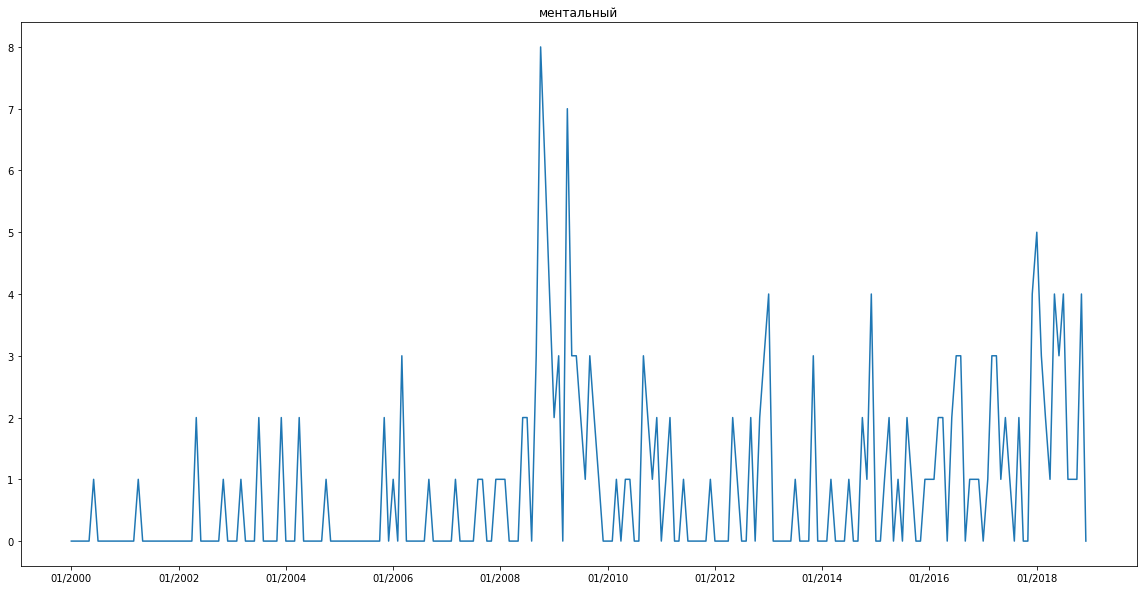

In [12]:
plot_by_month(word)

Всё ещё слишком рваный график!